0        1
1        1
2        2
3        2
4        3
      ... 
243    152
244    153
245    153
246    154
247    154
Name: 地点编号, Length: 248, dtype: int64
0      100
1       16
2       85
3       90
4       24
      ... 
243    153
244    150
245    154
246     16
247    148
Name: 地点编号.1, Length: 248, dtype: int64


<Figure size 2000x2000 with 0 Axes>

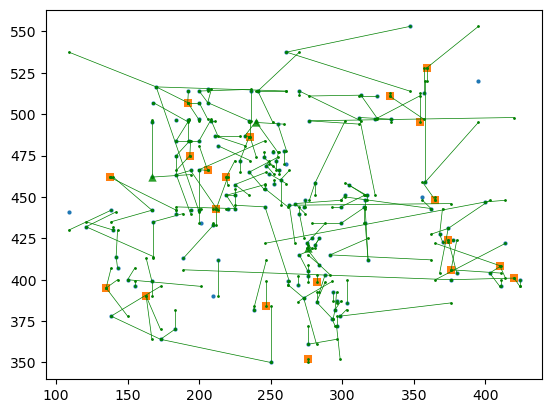

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

army_users = [125,106,73,31,141,150,85,79,1,130,36,27,34,42,94,11,24,75,145,22];
supply_station = [16,63,120]

address_data = pd.read_excel('data/附件1：154个地点的平面直角坐标及距离数据.xlsx')
route_data = pd.read_excel('data/附件1：154个地点的平面直角坐标及距离数据.xlsx',sheet_name="地点间道路")

address_index = address_data.loc[:,"编号"]
x_address = address_data.loc[:,"x轴"]
y_address = address_data.loc[:,"y轴"]
start_points = route_data.loc[:,"地点编号"]
end_points = route_data.loc[:,'地点编号.1']
print(start_points)
print(end_points)

# Draw normal users
fig = plt.figure(figsize=(20,20))
fig,ax = plt.subplots()
ax.scatter(x_address,y_address,marker='.',linewidths=0.01)


# Draw army users
army_users_x = []
army_users_y = []
for i in army_users:
    army_users_x.append(x_address[i-1])
    army_users_y.append(y_address[i-1])
ax.scatter(army_users_x,army_users_y,marker=',',linewidths=0.01)

supply_station_x = []
supply_station_y = []
for i in supply_station:
    supply_station_x.append(x_address[i-1])
    supply_station_y.append(y_address[i-1])
ax.scatter(supply_station_x,supply_station_y,marker='^',linewidths=0.01)


point_x_address = []
point_y_address = []
for i in range (0,len(start_points)):
    start_index = start_points[i]
    end_index = end_points[i]
    start_point_x = x_address[start_index-1]
    start_point_y = y_address[start_index-1]
    point_x_address.append(start_point_x)
    point_x_address.append(end_point_x)
    end_point_x = x_address[end_index-1]
    end_point_y = y_address[end_index-1]
    point_y_address.append(start_point_y)
    point_y_address.append(end_point_y)
    ax.plot(point_x_address,point_y_address,marker='o',linewidth=0.5,color='green',markersize=1)
    point_x_address.clear()
    point_y_address.clear()

plt.show()


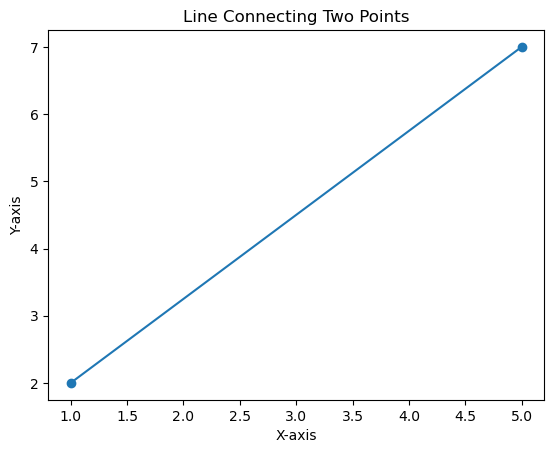

In [83]:
import matplotlib.pyplot as plt

# 两个点的坐标
point1 = (1, 2)
point2 = (5, 7)

# 提取坐标
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

# 绘制直线
plt.plot(x_values, y_values, marker='o')

# 添加标题和坐标轴标签
plt.title('Line Connecting Two Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 显示图形
plt.show()
